## M10-L1 Problem 1

In this problem you will implement the K-Means algorithm from scratch, and use it to cluster two datasets: a "blob" shaped dataset with three classes, and a "moon" shaped dataset with two classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons

## DO NOT MODIFY
def plotter(x, y, labels = None, centers = None):
    fig = plt.figure(dpi = 200)
    for i in range(len(np.unique(y))):
        if labels is not None:
            plt.scatter(x[labels == i, 0], x[labels == i, 1], alpha = 0.5)
        else:
            plt.scatter(x[y == i, 0], x[y == i, 1], alpha = 0.5)
    if labels is not None:
        if (labels != y).any():
            plt.scatter(x[labels != y, 0], x[labels != y, 1], s = 100, c = 'None', edgecolors = 'black', label = 'Misclassified Points')
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c = 'red', label = 'Cluster Centers')
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    if labels is not None or centers is not None:
        plt.legend()
    plt.show()

We will use `sklearn.datasets.make_blobs()` to generate the dataset. The `random_state = 12` argument is used to ensure all students have the same data.

In [2]:
## DO NOT MODIFY
x, y = make_blobs(n_samples = 300, n_features = 2, random_state = 12)

Visualize the data using the `plotter(x,y)` function. You do not need to pass the `labels` or `centers` arguments

In [3]:
## YOUR CODE GOES HERE

Now we will begin to create our own K-Means function. 

First you will write a function `find_cluster(point, centers)` which returns the index of the cluster center closest to the given point.
- `point` is a one dimensional numpy array containing the $x_0$ and $x_1$ coordinates of a single data point
- `centers` is a $3 \times 2$ numpy array containing the coordinates of the three cluster centers at any given iteration
- **return** the index of the closest cluster center

In [3]:
## FILL IN THE FOLLOWING FUNCTION
def find_cluster(point, centers):
    distances = np.sqrt(((centers - point) ** 2).sum(axis=1))
    return np.argmin(distances)

Next, write a function `assign_labels(x, centers)` which will loop through all the points in `x` and use the `find_cluster()` function we just wrote to assign the label of the closest cluster center. Your function should return the labels
- `x` is a $300 \times 2$ numpy array containing the coordinates of all the points in the dataset
- `centers` is a $3 \times 2$ numpy array containing the coordinates of the three cluster centers at any given iteration
- **return** a one dimensional numpy array of length $300$ containing the corresponding label for each point in `x`

In [4]:
## FILL IN THE FOLLOWING FUNCTION
def assign_labels(x, centers):
    labels = np.array([find_cluster(point, centers) for point in x])
    return labels

Next, write a function `update_centers(x, labels)` which will compute the new cluster centers using the centroid of each cluster, provided all the points in `x` and their corresponding labels
- `x` is a $300 \times 2$ numpy array containing the coordinates of all the points in the dataset
- `labels` is a one dimensional numpy array of length $300$ containing the corresponding label for each point in `x`
- **return** a $3 \times 2$ numpy array containing the coordinates of the three cluster centers

In [5]:
## FILL IN THE FOLLOWING FUNCTION
def update_centers(x, labels):
    centers = np.array([x[labels == i].mean(axis=0) for i in np.unique(labels)])
    return centers

Finally write a function `myKMeans(x, init_centers)` which will run the KMeans algorithm, provided all the points in `x` and the coordinates of the initial cluster centers in `init_centers`. Run the algorithm until there is no change in cluster membership in subsequent iterations. Your function should return both the `labels`, the labels of each point in x, and `centers`, the final coordinates of each of the cluster centers.
- `x` is a $300 \times 2$ numpy array containing the coordinates of all the points in the dataset
- `init_centers` is a $3 \times 2$ numpy array containing the coordinates of the three cluster centers provided to you
- **return** `labels` and `centers` as defined above

In [6]:
## FILL IN THE FOLLOWING FUNCTION
def myKMeans(x, init_centers):
    centers = init_centers
    while True:
        labels = assign_labels(x, centers)
        new_centers = update_centers(x, labels)
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return labels, centers

Now use your `myKMeans()` function to cluster the provided data points `x` and set the initial cluster centers as `init_centers = np.array([[-5,5],[0,0],[-10,10]])`. Then use the provided plotting function, `plotter(x,y,labels,centers)` to visualize your model's clustering.

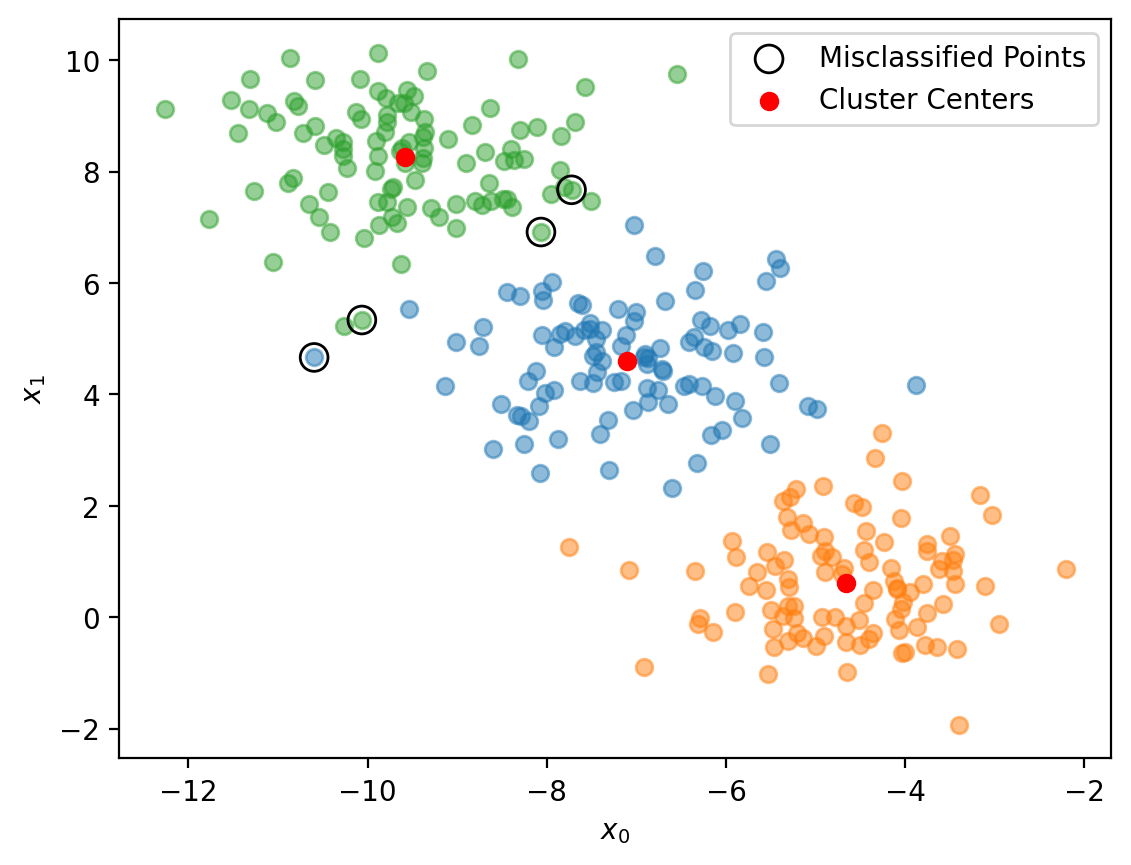

In [7]:
## YOUR CODE GOES HERE
# Provided code
x, y = make_blobs(n_samples=300, n_features=2, random_state=12)

# Initial centers
init_centers = np.array([[-5, 5], [0, 0], [-10, 10]])

# Applying KMeans
labels, centers = myKMeans(x, init_centers)

# Visualize the result
plotter(x, y, labels, centers)


## Moon Dataset

Now we will try using our `myKMeans()` function on a more challenging dataset, as generated below.

In [8]:
## DO NOT MODIFY
x,y = make_moons(n_samples = 300, noise = 0.1, random_state = 0)

Visualize the data using the `plotter(x,y)` function.

In [10]:
## YOUR CODE GOES HERE

Using your `myKMeans()` function and `init_centers = np.array([[0,1],[1,-0.5]])` cluster the data, and visualize the results using `plotter(x,y,labels,centers)`.

In [11]:
## YOUR CODE GOES HERE